### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


## Hierarchical clustering

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [3]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [43]:
#Droping the first column as it is a categorical and not relevent in clustering
data1 = crime.drop('Unnamed: 0', axis=1)
data1.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape', 'clusterid_new'], dtype='object')

In [44]:
## defining the normalize function
def n_data(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [45]:
# Normalizing data using the defined function
norm_data= n_data(data1)
norm_data.head()

,Murder,Assault,UrbanPop,Rape,clusterid_new
0,0.746988,0.654110,0.440678,0.359173,0.333333
1,0.554217,0.746575,0.271186,0.961240,0.666667
2,0.439759,0.852740,0.813559,0.612403,0.666667
3,0.481928,0.496575,0.305085,0.315245,0.333333
4,0.493976,0.791096,1.000000,0.860465,0.666667


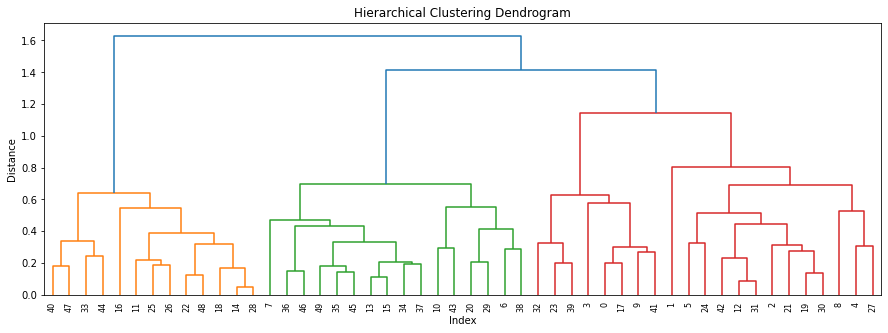

In [47]:
# create dendrogram using normalized data
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(norm_data, method='complete'))

In [12]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [48]:
y_hc = hc.fit_predict(norm_data)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [49]:
norm_data['h_clusterid'] = Clusters
norm_data.head()

,Murder,Assault,UrbanPop,Rape,clusterid_new,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0.333333,3
1,0.554217,0.746575,0.271186,0.961240,0.666667,0
2,0.439759,0.852740,0.813559,0.612403,0.666667,0
3,0.481928,0.496575,0.305085,0.315245,0.333333,3
4,0.493976,0.791096,1.000000,0.860465,0.666667,0


### K-MEANS

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
scaled_crime = scaler.fit_transform(norm_data.iloc[:,1:])

In [51]:
scaled_crime

array([[ 0.79078716, -0.52619514, -0.00345116, -0.38760987,  1.56203089],
       [ 1.11805959, -1.22406668,  2.50942392,  0.45502028, -1.33061891],
       [ 1.49381682,  1.00912225,  1.05346626,  0.45502028, -1.33061891],
       [ 0.23321191, -1.08449238, -0.18679398, -0.38760987,  1.56203089],
       [ 1.2756352 ,  1.77678094,  2.08881393,  0.45502028, -1.33061891],
       [ 0.40290872,  0.86954794,  1.88390137,  0.45502028, -1.33061891],
       [-0.73648418,  0.79976079, -1.09272319, -1.23024001,  0.59781429],
       [ 0.81502956,  0.45082502, -0.58583422, -1.23024001,  0.59781429],
       [ 1.99078607,  1.00912225,  1.1505301 ,  0.45502028, -1.33061891],
       [ 0.48775713, -0.38662083,  0.49265293, -0.38760987,  1.56203089],
       [-1.51224105,  1.21848371, -0.11129987, -1.23024001,  0.59781429],
       [-0.61527217, -0.80534376, -0.75839217,  1.29765042, -0.36640231],
       [ 0.94836277,  1.21848371,  0.29852525,  0.45502028, -1.33061891],
       [-0.70012057, -0.03768506, -0.0

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


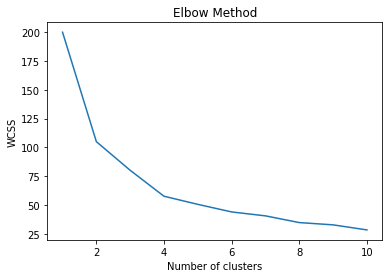

In [23]:
#Finding the within cluster sum of squares- WCSS
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
#Build cluster algorithm
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crime)

KMeans(n_clusters=4, random_state=42)

In [25]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [52]:
#Assign clusters to the data set
norm_data['clusterid_new'] = clusters_new.labels_
norm_data.head(30)

,Murder,Assault,UrbanPop,Rape,clusterid_new,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,1,3
1,0.554217,0.746575,0.271186,0.961240,2,0
2,0.439759,0.852740,0.813559,0.612403,2,0
3,0.481928,0.496575,0.305085,0.315245,1,3
4,0.493976,0.791096,1.000000,0.860465,2,0
5,0.427711,0.544521,0.779661,0.811370,2,0
6,0.150602,0.222603,0.762712,0.098191,0,2
7,0.307229,0.660959,0.677966,0.219638,0,2
8,0.879518,0.993151,0.813559,0.635659,2,0
9,1.000000,0.568493,0.474576,0.478036,1,3


In [54]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [53]:
norm_data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,0.292545,0.321490,0.709746,0.296673,2
1,1,0.791416,0.680223,0.368644,0.364664,3
2,2,0.603336,0.727345,0.745763,0.669052,0
3,3,0.168675,0.114858,0.340287,0.126019,1


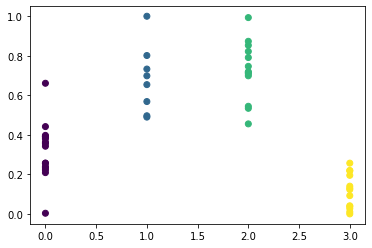

In [55]:
plt.scatter(norm_data['clusterid_new'],norm_data['Assault'], c=clusters_new.labels_)

### DBSCAN 

In [31]:
from sklearn.cluster import DBSCAN

In [32]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [33]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     50 non-null     object 
 1   Murder         50 non-null     float64
 2   Assault        50 non-null     int64  
 3   UrbanPop       50 non-null     int64  
 4   Rape           50 non-null     float64
 5   clusterid_new  50 non-null     int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.3+ KB


In [56]:
#Building the DBSAN algorithm
dbscan = DBSCAN(eps= 0.25,min_samples=4)
dbscan.fit(norm_data)
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,  1, -1,  2,  1,  2,  1,
        0,  1, -1,  3, -1,  1, -1, -1,  1,  1, -1,  1,  3, -1, -1, -1,  1,
        2,  2,  2,  2,  3,  0,  1,  0, -1,  2,  1,  2,  2,  1,  1,  2],
      dtype=int64)

In [57]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,2
7,-1
8,-1
9,-1


In [58]:
pd.concat([norm_data,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,clusterid_new,h_clusterid,cluster
0,0.746988,0.654110,0.440678,0.359173,1,3,0
1,0.554217,0.746575,0.271186,0.961240,2,0,-1
2,0.439759,0.852740,0.813559,0.612403,2,0,-1
3,0.481928,0.496575,0.305085,0.315245,1,3,-1
4,0.493976,0.791096,1.000000,0.860465,2,0,-1
5,0.427711,0.544521,0.779661,0.811370,2,0,-1
6,0.150602,0.222603,0.762712,0.098191,0,2,2
7,0.307229,0.660959,0.677966,0.219638,0,2,-1
8,0.879518,0.993151,0.813559,0.635659,2,0,-1
9,1.000000,0.568493,0.474576,0.478036,1,3,-1


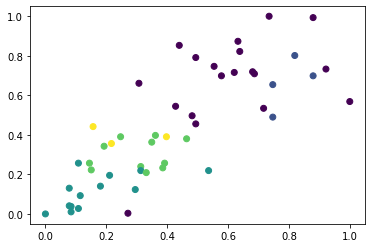

In [60]:
plt.scatter(norm_data['Murder'],norm_data['Assault'], c=dbscan.labels_)